# Adrien Justus, 53148 (TO BE FILLED BY THE STUDENT)

# Advanced Data Analysis - Assignment 3

This notebook contains the proposed solution for **Assignment 3** of the Advanced Data Analysis course.


### DEADLINE: 9-November-2022

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. While doing this assignment, you can use or adapt any code from the lectures if you want. 

Students have three grace days that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
        
### Notebook Instructions
* You only need to deliver this notebook file (notice that, a notebook file extension is filename.ipynb) - Data files must not be submitted
* The notebook should be delivered with the outputs already available


# Group I 

Nowadays, industry players are using product quality certifications to promote their products.
Vital factor in red wine certification and quality assessment is physicochemical tests, which
are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical
properties. We would like to determine which feature(s) can be used regression that
best predicts the quality red wine.

Structure of the dataset:
Input variables (based on physicochemical tests):
- Fixed Acidity: Most acids involved with wine or fixed or non-volatile (do not evaporate readily)
- Volatile Acidity: The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- Citric Acid: Often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes
- Residual Sugar: From the natural grape sugars left in a wine after the alcoholic fermentation finishes.
- Chlorides: The amount of salt in the wine
- Free Sulfur Dioxide: It prevents microbial growth and the oxidation of wine
- Total Sulfur Dioxide: The amount of free + bound forms of SO₂
- Density: Sweeter wines have a higher density
- pH: Describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale
- Alcohol: Available in small quantities in wines makes the drinkers sociable
- Sulphates: A wine additive that contributes to SO₂ levels and acts as an antimicrobial and antioxidant
- Quality: which is the output variable/predictor

The dataset source is taken from https://archive.ics.uci.edu/ml/datasets/wine+quality.


In [55]:
# This code cell does not need to be changed
import os
import pandas as pd
from sklearn import linear_model

dataFileName = "winequality-red.csv"
dataDF = pd.read_csv(dataFileName)

dataDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Question 1 (1 point out of 20)

Identify the variables that are more linearly correlated with the quality of red wine

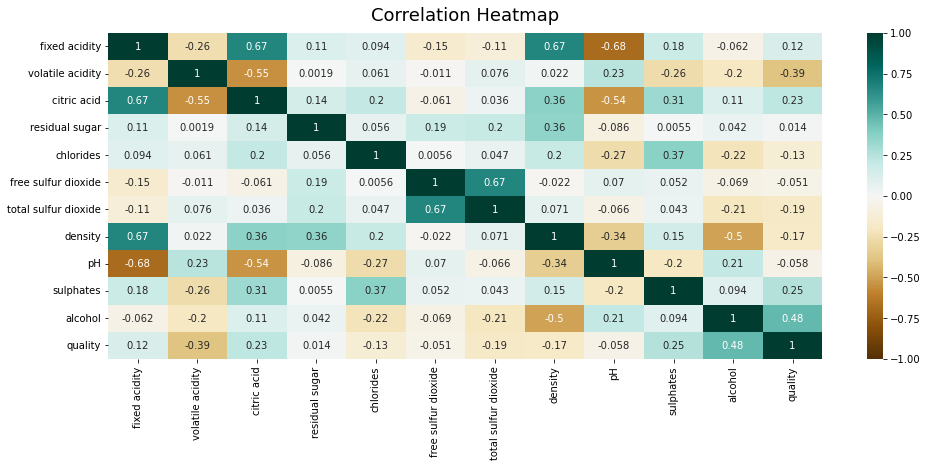

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataDF.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

If we look at the last row/column of the heatmap, we can see that alcohol has the strongest positive correlation with quality, while volatile acidity has the storingest negative linear correaltion with quality.

In [57]:
corr_matrix = dataDF.corr().abs()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64

## Question 2 ( 2 points out of 20)

Estimate the true error of a model that uses the top 4 variables more correlated with the quality of red wine

In [58]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

y = dataDF[['quality']]
X = dataDF[['alcohol', 'volatile acidity', 'sulphates', 'citric acid']]

linear_reg = linear_model.LinearRegression()
scores = -1*cross_val_score(linear_reg, X, y, scoring='neg_mean_squared_error', cv=10)
print(scores.mean())

0.44395180385374655


## Question 3 ( 4 points out of 20)

Evaluate two other models of your choice and compare/discuss their expected errors? (explain your criteria for each model tested)

In [59]:
#Model 1: Multi - linear regression with all variables, to see if more variables will reduce the error of the prediction
X2 = dataDF[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
scores2 = -1*cross_val_score(linear_reg, X2, y, scoring='neg_mean_squared_error', cv=10)
print(scores2.mean())

0.4351849040300918


In [60]:
#Model 2: poly model with alcohol as input, to see if we can get better predictions by reducing the number of variables and changing the degree

from sklearn.preprocessing import PolynomialFeatures
x =  dataDF[['alcohol']]

def trans_data(degree):
    polynomial_features = PolynomialFeatures(degree)
    poly_trans = polynomial_features.fit_transform(x)
    input_df = pd.DataFrame(poly_trans)
    return input_df

model = linear_model.LinearRegression()

df = pd.DataFrame({'degree' : range(1, 11 ,1)})

df['test_error'] = df['degree'].apply(lambda x: cross_val_score(model, trans_data(x), y, scoring='neg_mean_squared_error', cv=10).mean())
df.sort_values('test_error', ascending=False)

,degree,test_error
2,3,-0.507529
3,4,-0.509017
0,1,-0.510171
1,2,-0.510860
4,5,-0.514243
5,6,-0.527722
6,7,-0.657958
7,8,-1.445768
8,9,-2.324913
9,10,-3.798067


**Rational:** if we compare the models, we can see that the multi-linear model with all variables has the lowest test error

## Question 4 ( 3 points out of 20)

Based on the best model identified previously, build a final model, report the formula (coefficients found) and evaluate it. On average, how far is your predictions from the actual values?

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_set, test_set = train_test_split(dataDF, test_size = 0.1, random_state = 3)
x_train = train_set[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y_train = train_set[['quality']]

x_test = test_set[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y_test = test_set[['quality']]

linear_reg.fit(x_train, y_train)
    
y_train_pred = linear_reg.predict(x_train)
y_test_pred = linear_reg.predict(x_test)
    
error_train = mean_squared_error(y_train, y_train_pred)
error_test = mean_squared_error(y_test, y_test_pred)
coef = linear_reg.coef_

print('Train Error: ', error_train)
print('Test Error: ', error_test)    
print ('coefficients = ', coef)

Train Error:  0.422705376028274
Test Error:  0.3668051370896334
coefficients =  [[ 3.10832805e-02 -1.02693022e+00 -1.48413042e-01  1.98245964e-02
  -1.86653472e+00  4.81665119e-03 -3.38436790e-03 -1.90945012e+01
  -4.14529692e-01  8.57804193e-01  2.82231839e-01]]


In [62]:
residuals = y_test - y_test_pred
residuals.abs().mean()

quality    0.470515
dtype: float64

On average, the prediction is of by 0.47 from the actual values

# Group II

The file internet.csv contains the estimated number of internet users (in millions) for each year from 1995
through 2012. For answering the following questions, you can use or adapt any code from the lectures or exercises
if you want.


In [63]:
dataFileName = "internet.csv"
dataDF = pd.read_csv(dataFileName)

In [64]:
dataset_df = pd.DataFrame()
dataset_df['year'] = dataDF.index
dataset_df['n_users'] = dataDF['n_users']
dataset_df.head()

,year,n_users
0,0,16
1,1,36
2,2,70
3,3,147
4,4,248


## Question 1 (5 points out of 20)

In lecture 6, we used the logistic function with an offset parameter to better fit the curve to some arbitrary starting point:

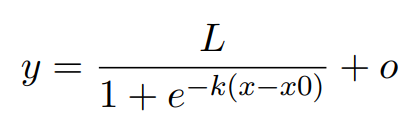

Fit this model to the data and show to the plots of the data and the curve predicted by the
model. Additionally, display the parameters found for the logistic model and explain the meaning of each one.  

Note: I suggest you use these starting values for the minimization: L = 1000, x0 = 10, k = 0.1 and
o = −300. If you use other values the minimization may not converge properly.


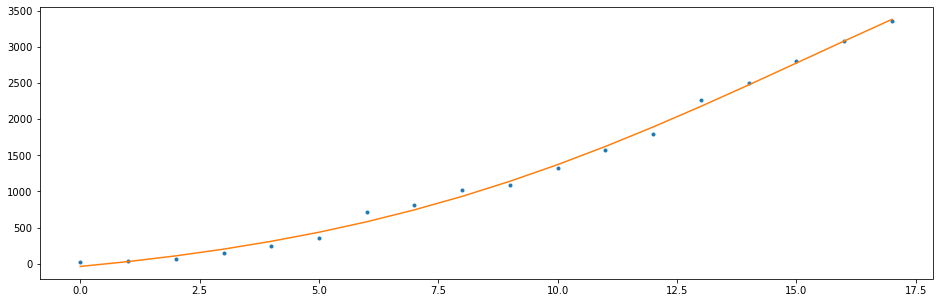

In [65]:
import numpy as np
from scipy.optimize import minimize # Here we are going to use the minimize function 

x = dataset_df[['year']]
y = dataset_df[['n_users']]

# Logistic Function
def logistic(x,x0,L,k):
    return L/(1 + np.exp(-k*(x-x0)))

# Cost function - Minimize mean squared error
def log_cost(params, data):
    x0,L,k,offset = params
    pred = logistic(data.iloc[:,0],x0,L,k) + offset
    return np.mean( (pred-data.iloc[:,1])**2)

st_params = [10,1000,0.1,-300]
plt.figure(figsize=(16,5))
res=minimize(log_cost,st_params,args=(dataset_df))
x0,L,k,offset = res.x # Best parameters found

# Used the model found (logistic model with a set of parameters and an offset) to predict the values
pred = logistic(dataset_df.iloc[:,0],x0,L,k) + offset

# Plot the data and the model built
plt.plot(dataset_df.iloc[:,0],dataset_df.iloc[:,1],'.')
plt.plot(dataset_df.iloc[:,0],pred)

In [66]:
res.x
x0,L,k,offset

(15.2212471627949, 6462.292036052112, 0.1887138239186362, -384.73521190456626)

**x0: 15.2** is the sigmoid's midpoint

**L: 6462.3** is the change (difference between between start and end point)

**k: 0.189** is the logistic growth rate or steepness of the curve (slope factor)

**offset: -384.7** is the start

## Question 2 (2 points out of 20)

Compute and plot the residuals of the model found. What can we tell about the model identified based on the Residual Plot? Is a logistic function a good option to model users' growth over time in our dataset?

Text(0, 0.5, 'Residual Value')

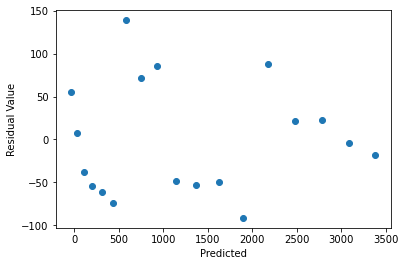

In [67]:
pred = pred.to_frame()
pred.rename(columns = {'year':'n_users'}, inplace = True) 

residuals = y - pred

plt.scatter(pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual Value')

**Rational:** when looking at the datapoints, we can conclude that there is no significant clustering in specific areas and no particular patterns/ shapes. Therefore, the model is appropriate to predict the growth of users.

## Question 3 (3 points out of 20)

Compute the 95% confidence interval for its parameters under the assumption that the random error affecting the data points comes from the same distribution for all points.

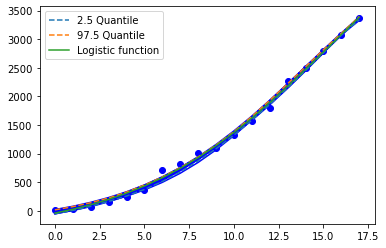

In [68]:
params = []
lines = []
pred = logistic(dataset_df.iloc[:,0],x0,L,k) + offset

residual = dataset_df.iloc[:,1]-pred

plt.scatter(x, y, color='blue')
replicas = 10

df_unc = pd.DataFrame(x)

i = 0;
for _ in range(replicas):

    rep_data = dataset_df.copy() 

    rep_data.iloc[:,1] = pred + residual*np.random.normal(size=dataset_df.shape[0])

    res=minimize(log_cost,st_params,args=(rep_data))
    x0,L,k,offset = res.x
    pred_replica = logistic(dataset_df.iloc[:,0],x0,L,k)+offset

    df_unc =  pd.concat([df_unc, pred_replica], axis=1) 
    df_unc
    i = i + 1;
    plt.plot(dataset_df.iloc[:,0], df_unc.iloc[:,i] , c = 'blue')
    
#calculate 95 confidence interval
df_unc['predicted_n_user'] = pred
df_unc['q025'] = df_unc.iloc[:,1:].quantile(0.025, axis = 1,interpolation = 'midpoint')
df_unc['q975'] = df_unc.iloc[:,1:].quantile(0.975, axis = 1,interpolation = 'midpoint')

#plot model and confidence interval
plt.plot(dataset_df.iloc[:,0],df_unc.loc[:,'q025'], linestyle='dashed', label = "2.5 Quantile")
plt.plot(dataset_df.iloc[:,0],df_unc.loc[:,'q975'], linestyle='dashed', label = "97.5 Quantile")
plt.plot(dataset_df.iloc[:,0],pred, label = "Logistic function")
plt.legend()